# DT2470 Lab 02: Teh Machine Learnings

by Bob L. T. Sturm

In this lab you will practice some fundamental concepts of machine learning. In the first part you will work with an artificial dataset. The second part involves a music dataset. There's a lot more to explore, so this lab only scratches the surface!

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python.

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Pandas API](https://pandas.pydata.org/docs/reference/index.html#api)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


---



# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.

For more information:
- [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html) 

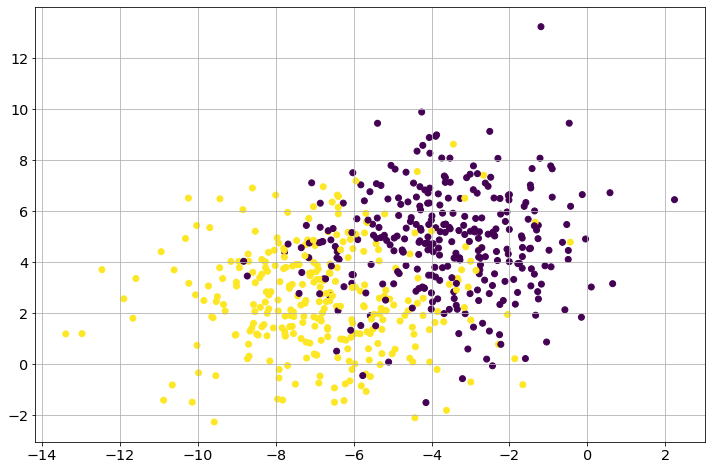

In [1]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [36]:
from sklearn.model_selection import train_test_split
# add your code below

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X.shape)
print(y.shape)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(600, 2)
(600,)
(480, 2) (120, 2)
(480,) (120,)


# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [37]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=1)
knnClassifier.fit(X_train, y_train)

meanAcc = knnClassifier.score(X_test, y_test)
print(meanAcc)

0.8416666666666667


# 1.3 

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

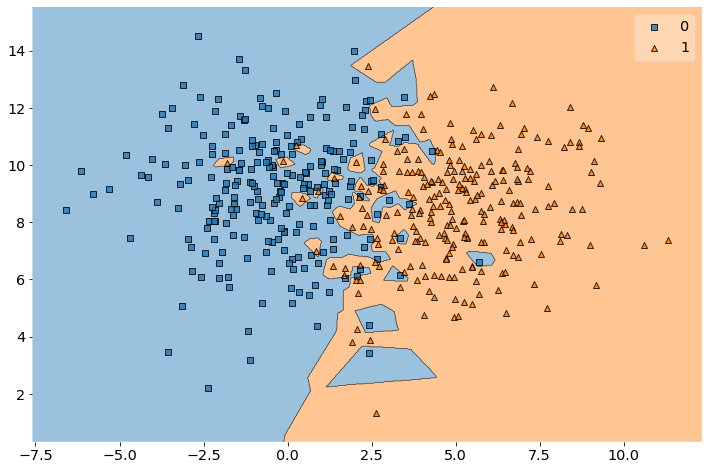

In [38]:
from mlxtend.plotting import plot_decision_regions
# add your code below

plot_decision_regions(X_train, y_train, knnClassifier)
plt.show()

### My Notes

We see a complex decision boundary which comes with overfitting, when k=1.

# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels. 

In [39]:
# add your code below
predictions = knnClassifier.predict(X_test)
print(predictions)
print(y_test)

# Print number of errors, should be zero when the accuracy printed above is equal to 1.0
print(np.sum(np.abs(predictions - y_test)))

[0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0]
[1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 1 0]
19


# 1.5 

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

In [40]:
# add your code below
from sklearn.metrics import confusion_matrix

confMat = confusion_matrix(y_test, predictions)
print(confMat)

[[55  8]
 [11 46]]


### My Notes

In the confusion matrix, the rows correspond to the true class/label, and the columns correspond to the predicted label. So for example the top-left element shows the number of true positives for class 0. The top-right element shows the number of false negatives for class 0, i.e. class 0 instances that were predicted to be class 1. 

# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [41]:
from sklearn.metrics import classification_report
# add your code below

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        63
           1       0.85      0.81      0.83        57

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



### My Notes

- Precision refers to the accuracy of the positive predictions. That is, how many of the classifications that were predicted to the current class out of all the predictions for this class. It is the percentage of positive predictions that are true. 


- Recall refers to the percentage of instances of the current class that were correctly predicted. 


- F1-score refers to a metric which embeds both Precision and Recall. Formally, this is the weighted harmonic mean of them: 2 * recall * precision / (recall + precision)


- Macro average assumes that all classes are of equal importance in its average formula, while weighted average will weigh each class score with the fraction of current-class instances in the dataset (test set). 


For unbalanced datasets, f1-score and macro average are interesting metrics while accuracy could be rather useless. 

# 1.7 

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [42]:
# add your code below

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=30/80)
print(y_train.shape[0] / numObservations, y_val.shape[0] / numObservations, y_test.shape[0] / numObservations)

0.5 0.3 0.2


# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

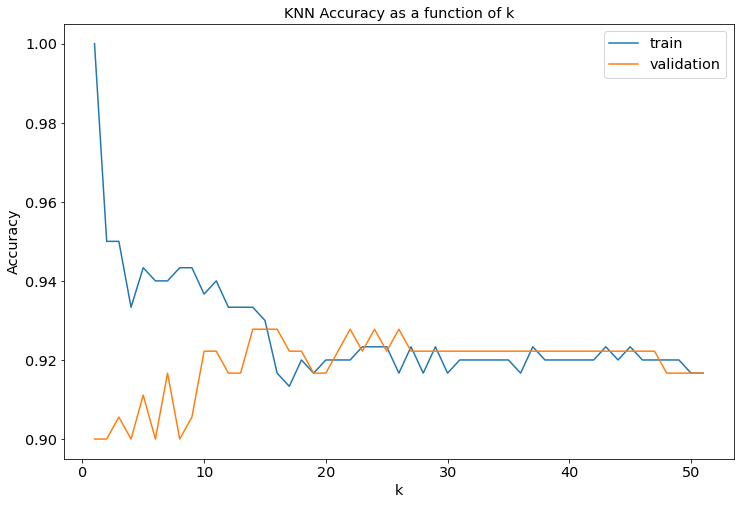

In [72]:
# add your code below

kRange = np.arange(1, 52)
trainAccuracies = []
valAccuracies = []

for k in kRange:
    knnClassifier = KNeighborsClassifier(n_neighbors=k)
    knnClassifier.fit(X_train, y_train)
    meanAccTrain = knnClassifier.score(X_train, y_train)
    trainAccuracies.append(meanAccTrain)
    meanAccVal = knnClassifier.score(X_val, y_val)
    valAccuracies.append(meanAccVal)

plt.plot(kRange, trainAccuracies, label="train")    
plt.plot(kRange, valAccuracies, label="validation")
plt.legend()
plt.title("KNN Accuracy as a function of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

### My Notes

It is expected that the validation accuracy gets better with lower model complexity, while the training accuracy gets worse. We see overfitting for small values in k. 

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

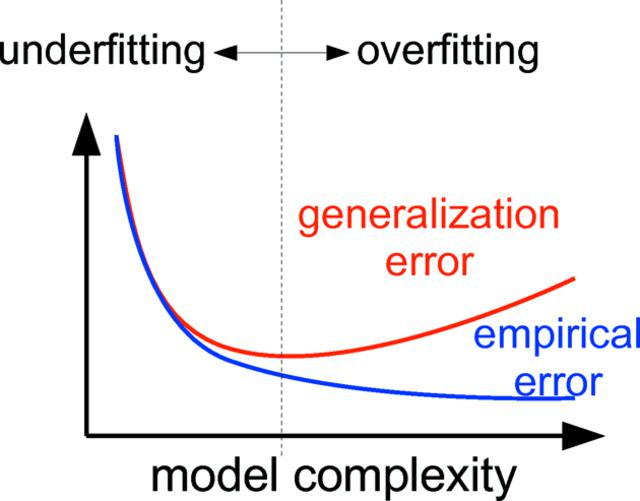

# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

In [73]:
# add your code below

# Find all indices with that gives maximum validation accuracy and flatten list to 1-d
maxIdxs = np.argwhere(valAccuracies == np.max(valAccuracies)).flatten()
# Take last element in this index list to get highest k
maxIdx = maxIdxs[-1]
kMax = kRange[maxIdx]
print("Chosen k =", kMax)

knnClassifier = KNeighborsClassifier(n_neighbors=kMax)
knnClassifier.fit(X_train, y_train)

predictions = knnClassifier.predict(X_test)
print(classification_report(y_test, predictions))

Chosen k = 26
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        59
           1       0.95      0.87      0.91        61

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



### My Notes

Out of all the k's that give maximum validation accuracy, I choose the highest k. The reasoning for this goes along with Occam's Razor, take the simplest model (lowest decision boundary complexity) that gives the best output. This could reduce overfitting and the generalization performance. 

# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

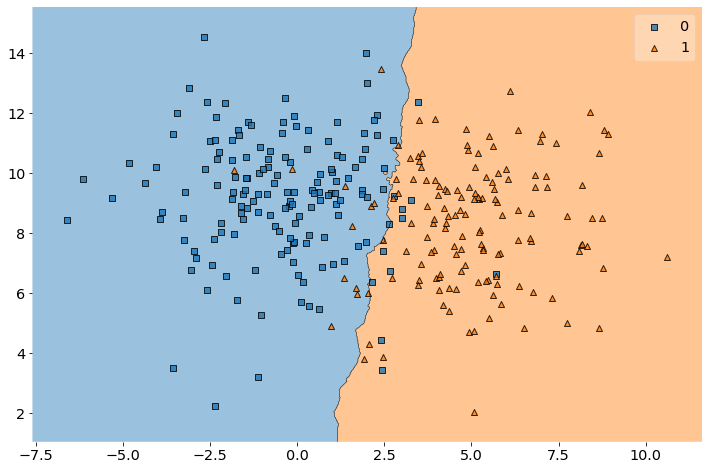

In [67]:
# add your code below

plot_decision_regions(X_train, y_train, knnClassifier)
plt.show()

### My Notes

We indeed see that the decision boundary is less complex than 1.3. Here it is almost a straight line, which makes sense given the true data distributions. 

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?

In [ ]:
# add your code below

NUM_OBSERVATIONS = 600
    
def trainTestPlot(numClasses, clusterStd):
    # print("Number of classes:", numClasses, ", Cluster standard deviation:", clusterStd)
    # Generate Data
    X, y = datasets.make_blobs(NUM_OBSERVATIONS, centers=numClasses, cluster_std=clusterStd)
    
    # Split data into 50/30/20 train/val/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=30/80)
    
    # Find best k
    kRange = np.arange(1, 52)
    trainAccuracies = []
    valAccuracies = []

    for k in kRange:
        knnClassifier = KNeighborsClassifier(n_neighbors=k)
        knnClassifier.fit(X_train, y_train)
        meanAccVal = knnClassifier.score(X_val, y_val)
        valAccuracies.append(meanAccVal)
    
    # Find all indices with that gives maximum validation accuracy and flatten list to 1-d
    maxIdxs = np.argwhere(valAccuracies == np.max(valAccuracies)).flatten()
    # Take last element in this index list to get highest k
    maxIdx = maxIdxs[-1]
    kMax = kRange[maxIdx]

    knnClassifier = KNeighborsClassifier(n_neighbors=kMax)
    knnClassifier.fit(X_train, y_train)
    
    # Evaluate model on test data
    acc = knnClassifier.score(X_test, y_test)
    
    # Plot Decision Boundary
    plot_decision_regions(X_train, y_train, knnClassifier)
    plt.title("NumClasses=" + str(numClasses) + ", clusterStd=" + str(clusterStd) + 
              "\nBest k=" + str(kMax) + ", Test Accuracy=" + str(np.around(acc, 2)))
    plt.show()
    
# Higher std
trainTestPlot(numClasses=2, clusterStd=3)
trainTestPlot(numClasses=2, clusterStd=4)

# More classes
trainTestPlot(numClasses=3, clusterStd=3)
trainTestPlot(numClasses=4, clusterStd=3)
    

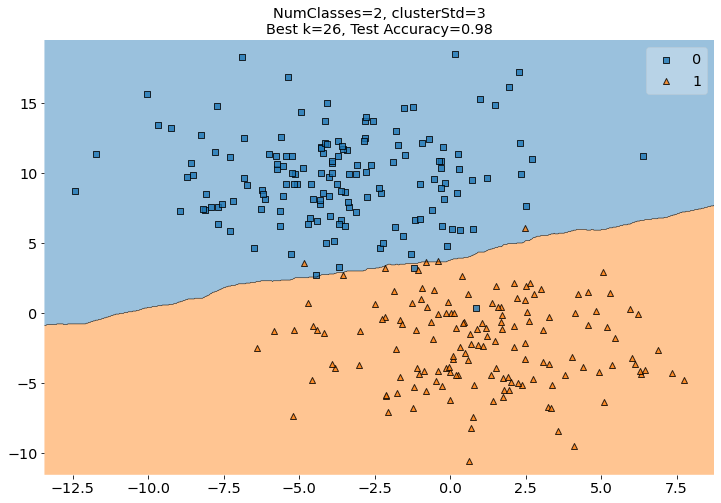

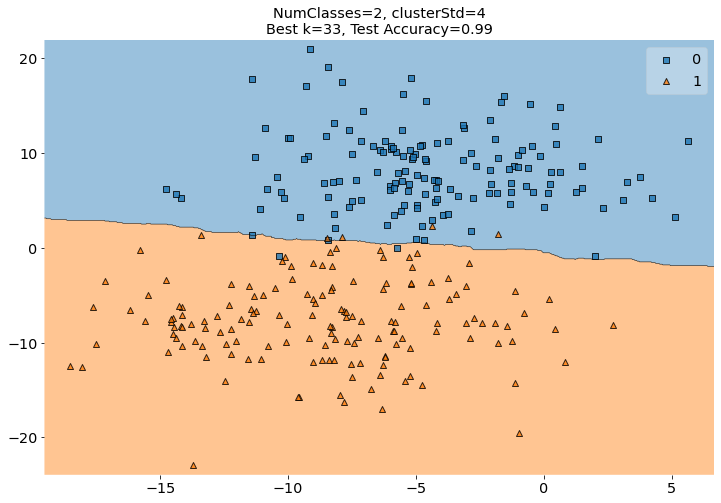

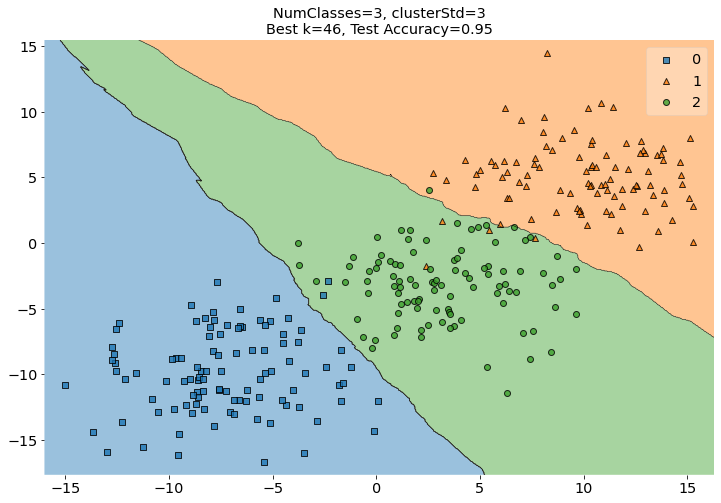

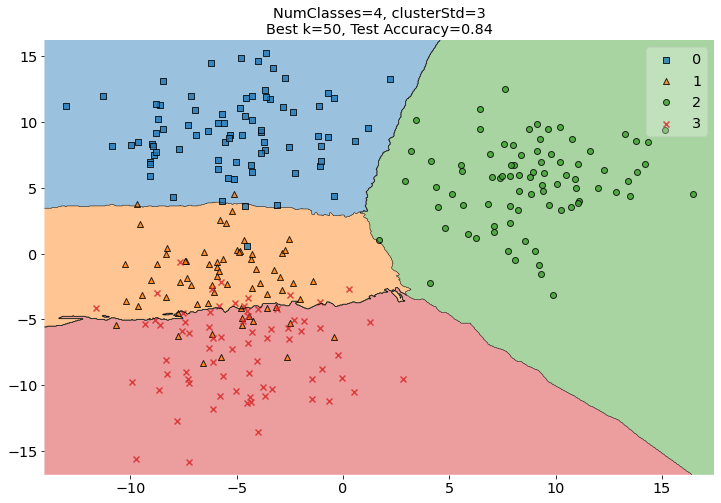

In [80]:
### My Notes

We can see that higher cluster standard deviation will result in more overlap between clusters and therefore more complex boundaries (lower optimal k) and lower accuracy. The same goes for adding more classes, more classes means less observations per class in my experiment and also increases the risk of overlapping clusters. 

More observations would most likely reduce the  complexity of the models as it enables them to use higher values of k since it would exist more observations inside each true cluster region. More observations will make the data more accurately represent the underlying distribution. However, with too high variance in the data distributions it is impossible for the model to identify outliers with the true label. 

### My Notes

We can see that higher cluster standard deviation will result in more overlap between clusters and therefore more complex boundaries (lower optimal k) and lower accuracy. The same goes for adding more classes, more classes means less observations per class in my experiment and also increases the risk of overlapping clusters. 

More observations would most likely reduce the  complexity of the models as it enables them to use higher values of k since it would exist more observations inside each true cluster region. More observations will make the data more accurately represent the underlying distribution. However, with too high variance in the data distributions it is impossible for the model to identify outliers with the true label. 

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them. 

Below are two functions we will use to extract features from the audio data.

In [1]:
import numpy as np

def extractZC( data, windowsizeinsamples, windowhopinsamples ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  numbersignchanges = []
  for ii in np.arange(totalnumberofwindows):
    windowstart = np.int(ii*windowhopinsamples)
    windowend = np.int(windowstart + windowhopinsamples)
    datasign = np.sign(data[windowstart:windowend])
    datasignderivative = datasign - np.roll(datasign,1)
    numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
  return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  centroid = []
  freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
  for ii in np.arange(totalnumberofwindows):
    windowstart = np.int(ii*windowhopinsamples)
    windowend = np.int(windowstart + windowsizeinsamples)
    DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
    centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                    np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
  return np.array(centroid)

# 2.1 

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a two-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like, just so you know.

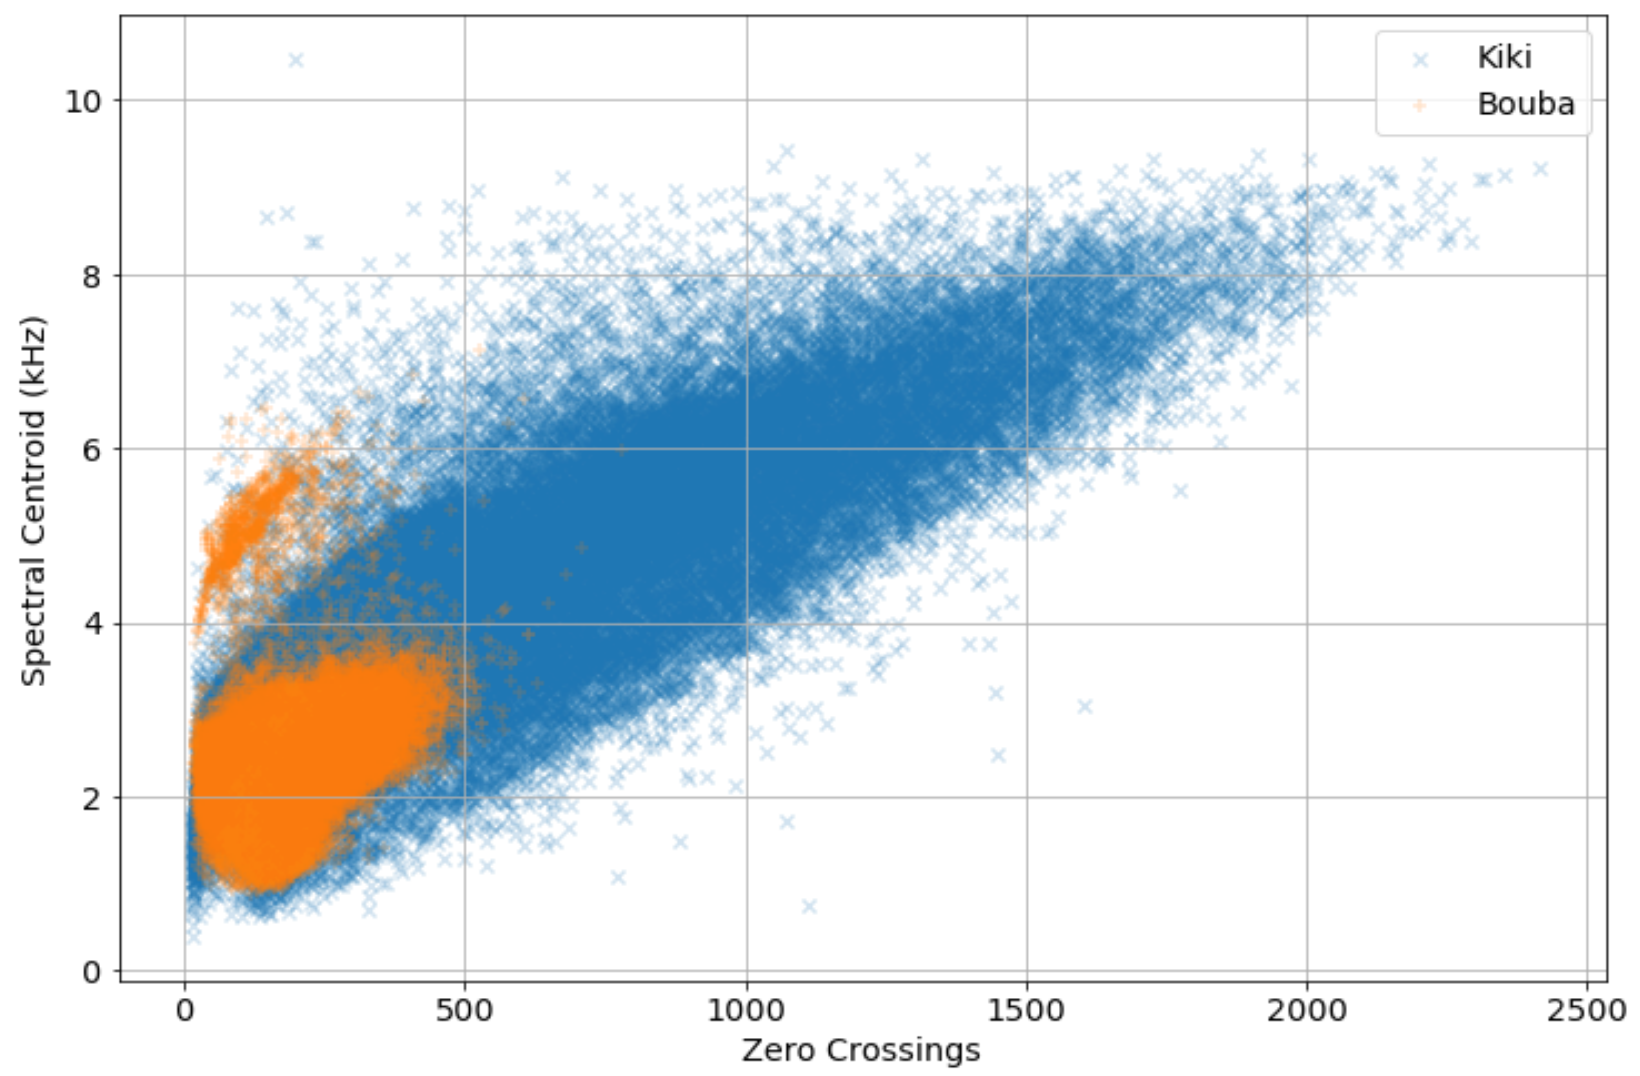

In [2]:
# add your code below

import os
import librosa
import matplotlib.pyplot as plt

# Assumes data directory lies in same directory as notebook
DATA_DIR_PATH = os.getcwd() + "/KikiBoubadata"

# Set all paths
KIKI_TRAIN_PATH = DATA_DIR_PATH + "/kikibouba_train/kiki/"
BOUBA_TRAIN_PATH = DATA_DIR_PATH + "/kikibouba_train/bouba/"
KIKI_TEST_PATH = DATA_DIR_PATH + "/kikibouba_test/kiki/"
BOUBA_TEST_PATH = DATA_DIR_PATH + "/kikibouba_test/bouba/"


# Assumes all files within directory have same sample rate, seemed like this is the case when printing most of them
def loadData(dataDirPath):
    directory = os.fsencode(dataDirPath)
    dataList = []
    sampleRate = None
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename == ".DS_Store":
            continue
        filePath = (dataDirPath + filename)
        data, sampleRate = librosa.load(filePath)
        dataList.append(np.array(data.data))
        
    return dataList, sampleRate

# Check if data is already loaded
# Assumes each directory contains files of same sample rate. 
try:
    kikiTrain
    kikiTest
    boubaTrain
    boubaTest
except:
    print("Loading kiki train data...")
    kikiTrain, sampleRate = loadData(KIKI_TRAIN_PATH)
    print("Loading kiki test data...")
    kikiTest, _ = loadData(KIKI_TEST_PATH)
    print("Loading bouba train data...")
    boubaTrain, _ = loadData(BOUBA_TRAIN_PATH)
    print("Loading bouba test data...")
    boubaTest, _ = loadData(BOUBA_TEST_PATH)
    print("Data loaded!")
else:
    print("Data already loaded!")
    

    
# Extract features
samplesPerMs = sampleRate / 1000
windowSize = samplesPerMs*100

kikiTrainZC = []
kikiTrainSC = []
for data in kikiTrain:
    zc = extractZC(data, windowSize, windowSize)
    sc = extractSC(data, windowSize, windowSize, sampleRate)
    kikiTrainZC.append(zc)
    kikiTrainSC.append(sc)
    
boubaTrainZC = []
boubaTrainSC = []
for data in boubaTrain:
    zc = extractZC(data, windowSize, windowSize)
    sc = extractSC(data, windowSize, windowSize, sampleRate)
    boubaTrainZC.append(zc)
    boubaTrainSC.append(sc)


Loading kiki train data...


C:\Users\Joeyeyey\Anaconda3\envs\CondaEnvironment\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Users\Joeyeyey\Anaconda3\envs\CondaEnvironment\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Loading kiki test data...
Loading bouba train data...
Loading bouba test data...
Data loaded!


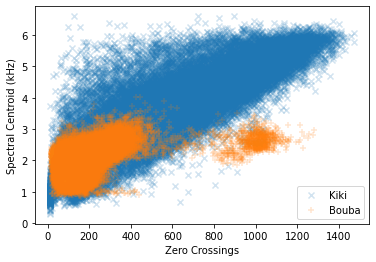

In [3]:
import matplotlib.pyplot as plt

kikiTrainZCFlattened = np.concatenate(kikiTrainZC).ravel()
kikiTrainSCFlattened = np.concatenate(kikiTrainSC).ravel() / 1000

boubaTrainZCFlattened = np.concatenate(boubaTrainZC).ravel()
boubaTrainSCFlattened = np.concatenate(boubaTrainSC).ravel() / 1000

plt.scatter(kikiTrainZCFlattened, kikiTrainSCFlattened, alpha=0.2, label="Kiki", marker="x")
plt.scatter(boubaTrainZCFlattened, boubaTrainSCFlattened, alpha=0.2, label="Bouba", marker="+")
plt.xlabel("Zero Crossings")
plt.ylabel("Spectral Centroid (kHz)")
plt.legend()
plt.show()

### My Notes

My plot is not exactly the same as the example plot, but my guess is that it is not on the exact same data. The distributions look very sane to me, comparing to the example plot. 

I concatenated the arrays of each feature over all the audio files for each set and plotted them all. And we can already start making quite good guesses on which dataset it belongs to given its point location in the ZC-SC space. 

# 2.2 

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by dividing its counts by the sum of all counts.

The function I use for this is [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). That means creating a pandas dataframe from the extracted features. Another possibility is using [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

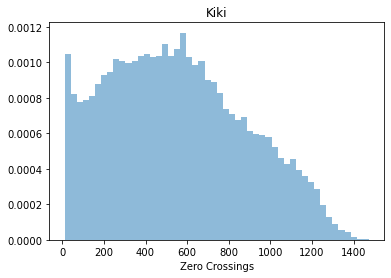

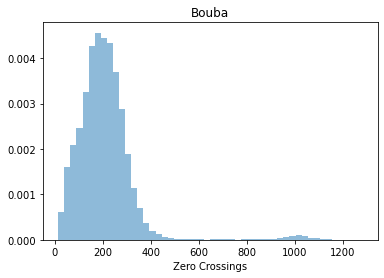

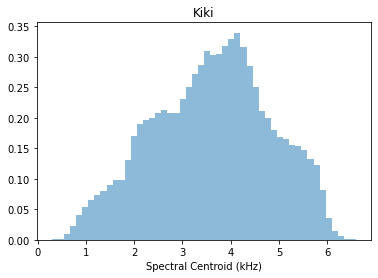

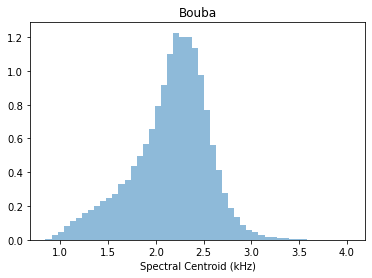

In [5]:
# add your code below

def plotNormalizedHist(data, title, xlabel):
    # counts, bins = np.histogram(data, bins=50)
    # normalizedBins = counts / np.sum(counts)
    # plt.hist(bins[0:-1], bins=50, weights=normalizedBins, alpha=0.5)
    plt.hist(data, bins=50, density=True, alpha=0.5)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
    
plotNormalizedHist(kikiTrainZCFlattened, "Kiki", "Zero Crossings")
plotNormalizedHist(boubaTrainZCFlattened, "Bouba", "Zero Crossings")
plotNormalizedHist(kikiTrainSCFlattened, "Kiki", "Spectral Centroid (kHz)")
plotNormalizedHist(boubaTrainSCFlattened, "Bouba", "Spectral Centroid (kHz)")


### My Notes

We can observe that bouba seem to have less variance in both the dimensions ZC and SC, while the spread is larger in the Kiki dataset.

# 2.3 

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.

Here's what mine look like:
![Screen%20Shot%202020-09-01%20at%2012.19.19.png](attachment:Screen%20Shot%202020-09-01%20at%2012.19.19.png)

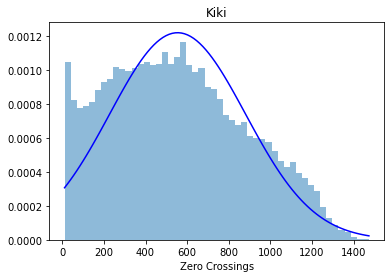

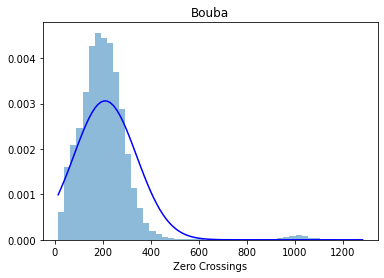

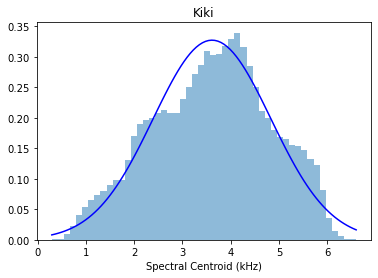

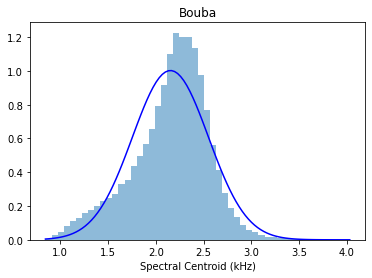

In [18]:
from scipy.stats import norm

# add your code below

# Takes data array and returns a normal distribution RV with empirical mean and standard deviation
def getNormRV(data):
    return norm(loc=np.mean(data), scale=np.std(data))

def plotNormAndHist(data, title, xlabel):
    normRV = getNormRV(data)
    x = np.linspace(np.min(data), np.max(data), 100)
    plt.hist(data, bins=50, density=True, alpha=0.5)
    plt.plot(x, normRV.pdf(x), color="blue")
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    return normRV
    
normKikiZC = plotNormAndHist(kikiTrainZCFlattened, "Kiki", "Zero Crossings")
normBoubaZC = plotNormAndHist(boubaTrainZCFlattened, "Bouba", "Zero Crossings")
normKikiSC = plotNormAndHist(kikiTrainSCFlattened, "Kiki", "Spectral Centroid (kHz)")
normBoubaSC = plotNormAndHist(boubaTrainSCFlattened, "Bouba", "Spectral Centroid (kHz)")

### My Notes

I could of course have coded the formulas given above in Python code, but as they are rather trivial, I thought it was not necessary. The gaussian approximation seem to work quite well, when the underlying distribution is not too skewed. 

# 2.4

Given a particular two-dimensional observation $\mathbf{x}$ extracted from an audio file, we want to estimate the probaility of $\mathbf{x}$ coming from class $g \in \{\textrm{Kiki},\textrm{Bouba}\}$, i.e., the *posterior* $P[g|\mathbf{x}]$.
By Bayes' Theorem, we can express this probability as:

$$P[G=g|\mathbf{x}] = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]}{f_\mathbf{X}(\mathbf{x})}$$

where the *likelihood* $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$ is the probability density of observing $\mathbf{x}$ from class $g$, $P[G=g]$ is the *prior* probability of encountering $g$ regardless of what we observe, and $f_\mathbf{X}(\mathbf{x})$ is the probability density of observing $\mathbf{x}$ no matter what class.

We define the *posterior odds* of Kiki as the ratio:
$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{P[G=\textrm{Kiki}|\mathbf{x}]}{P[G=\textrm{Bouba}|\mathbf{x}]}$$
Similarly, the posterior odds of Bouba is the ratio 
$$O(G=\textrm{Bouba}|\mathbf{x}) = \frac{P[G=\textrm{Bouba}|\mathbf{x}]}{P[G=\textrm{Kiki}|\mathbf{x}]} =\frac{1}{O(G=\textrm{Kiki}|\mathbf{x})}.$$

These are easy to understand. For instance, if $O(G=\textrm{Kiki}|\mathbf{x}) = 2$, then according to our model Kiki is twice as likely given $\mathbf{x}$ than Bouba, or Bouba is half as likely as Kiki. By plugging in the equation for $P[G=g|\mathbf{x}]$, the odds of Kiki can be expressed

$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Kiki})}{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Bouba})}\frac{P[G=\textrm{Kiki}]}{P[G=\textrm{Bouba}]}$$

So the posterior odds of Kiki is just the product of the ratio of posterior probability densities and prior probabilities.

If for an observation $O(G=\textrm{Kiki}|\mathbf{x}) > 2$, then we might label it as Kiki. Otherwise we could label it Bouba.
We just need to compute the densities $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$.

This is where our Gaussian models come into play.
We know the first element of $\mathbf{x}$ is the zero crossing feature, and the second element is spectral centroid. If we assume these two features are independent, then:

$$f_{\mathbf{X}|G}(x_z,x_s|G=g) = f_{X_z|G}(x_z|G=g)f_{X_s|G}(x_s|G=g)$$

where $x_z$ is the zero crossing feature, and $x_s$ is the spectral centroid features.
If we assume each feature is distributed Gaussian, then

$$f_{X_*|G}(x_*|G=g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x_*-\mu_{*,g})^2/2\sigma_{*,g}^2\right ].$$

Given our estimates of these four parameters $\{\mu_{z,g},\sigma_{z,g}^2,\mu_{s,g},\sigma_{s,g}^2\}$ for Kiki and for Bouba, we are *almost* ready to build a classification system.

We need to estimate the prior probabilities, $P[G=\textrm{Kiki}]$ and $P[G=\textrm{Bouba}]$.

To do that, assume the training data reflects how observations are distributed in the real world, and estimate $P[G=\textrm{Kiki}]$ as the proportion of observations of Kiki in the training dataset, and $P[G=\textrm{Bouba}]$ as the proportion of observations of Bouba in the training dataset.

In [24]:

numObsKiki = len(kikiTrain)
numObsBouba = len(boubaTrain)
numObsTot = numObsKiki + numObsBouba

priorKiki = numObsKiki / numObsTot
priorBouba = numObsBouba / numObsTot

print("Priors:", priorKiki, priorBouba)

def likelihoodFunc(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * (sigma ** 2))) * np.exp(-((x - mu) ** 2) / (2 * (sigma ** 2)))

# These should be equal
print(likelihoodFunc(200, normKikiZC.mean(), normKikiZC.std()))
print(normKikiZC.pdf(200))

Priors: 0.5 0.5
0.000678906200425482
0.000678906200425482


### My Notes

By using the odds instead of posterior distribution, we avoid having to deal with the evidence/normalization constant (denominator) in Bayes' theorem. I show that using the likelihood formula modelled in the function "likelihoodFunc", I get the same result as using the pdf from the normal variables. So I will be using these pdf:s instead. 

# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 2, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [52]:
# add your code below

# x is a list [ZC, SC]
def calcOddsKiki(x):
    priorRatio = priorKiki / priorBouba
    likelihoodRatio = (normKikiZC.pdf(x[0]) * normKikiSC.pdf(x[1])) / (normBoubaZC.pdf(x[0]) * normBoubaSC.pdf(x[1]))
    return likelihoodRatio * priorRatio

def predictClass(x):
    odds = calcOddsKiki(x)
    return 1 if odds > 2 else 0

exOdds = calcOddsKiki([kikiTrainZCFlattened[0], kikiTrainSCFlattened[0]])
prediction = predictClass([kikiTrainZCFlattened[0], kikiTrainSCFlattened[0]])
print(exOdds, prediction)

44.97786137966286 1


# 2.6 

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

(99395, 2)
(99395,)


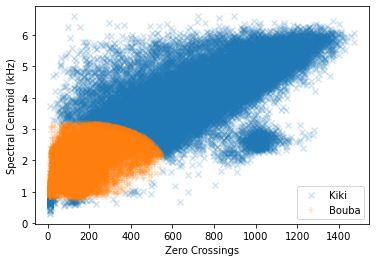

In [81]:
# add your code below

# Build dataset
trainSetZC = np.concatenate([boubaTrainZCFlattened, kikiTrainZCFlattened])
trainSetSC = np.concatenate([boubaTrainSCFlattened, kikiTrainSCFlattened])
trainSet = np.column_stack([trainSetZC, trainSetSC])
trainSetLabels = np.concatenate([np.zeros(len(boubaTrainZCFlattened)), np.ones(len(kikiTrainZCFlattened))])
print(trainSet.shape)
print(trainSetLabels.shape)

predictions = []
for d in trainSet:
    predictions.append(predictClass(d))
    
predictions = np.array(predictions)

indicesBouba = np.where(predictions == 0)[0]
indicesKiki = np.where(predictions == 1)[0]

pointsBouba = trainSet[indicesBouba]
pointsKiki = trainSet[indicesKiki]

plt.scatter(pointsKiki[:, 0], pointsKiki[:, 1], alpha=0.2, label="Kiki", marker="x")
plt.scatter(pointsBouba[:, 0], pointsBouba[:, 1], alpha=0.2, label="Bouba", marker="+")
plt.xlabel("Zero Crossings")
plt.ylabel("Spectral Centroid (kHz)")
plt.legend()
plt.show()

### My Notes

First i build a dataset of the features, where each row is a data point of the 2 extracted features. Then I plot the two scatters in the same plot to compare the results with the scatter plot from #2.1 more easily. 

# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.

### My Notes

We see that it works quite well, but fails to identify Bouba data points which do not lie directly in the main Bouba cluster. It also fails to capture the datapoints of Kiki which lies within the main Bouba cluster. This is expected, as with these features only, it is probably impossible to distinguish Kiki points from Bouba within the Bouba cluster. If I had to guess, I would also guess that a point therein would be Bouba as it is more probable. 

# 2.8 
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.

In [96]:
# add your code below
import sklearn.metrics as met

def printMetrics(labels, predictions):
    confMat = met.confusion_matrix(labels, predictions)
    print("Confusion matrix:\n", confMat)
    print("\nAccuracy:", met.accuracy_score(labels, predictions))
    print("Balanced Accuracy:", met.balanced_accuracy_score(labels, predictions))

    print("Precision 0 (Bouba):", met.precision_score(labels, predictions, pos_label=0))
    print("Precision 1 (Kiki):", met.precision_score(labels, predictions, pos_label=1))

    print("Recall 0 (Bouba):", met.recall_score(labels, predictions, pos_label=0))
    print("Recall 1 (Kiki):", met.recall_score(labels, predictions, pos_label=1))
    
printMetrics(trainSetLabels, predictions)

Confusion matrix:
 [[51976  1409]
 [13507 32503]]

Accuracy: 0.8499320891392927
Balanced Accuracy: 0.8400201012208133
Precision 0 (Bouba): 0.7937327245239222
Precision 1 (Kiki): 0.958451285680585
Recall 0 (Bouba): 0.9736068183946801
Recall 1 (Kiki): 0.7064333840469463


### My Notes

I use the sklearn library to calculate these metrics, the definition of them I explained in Part 1 of the lab (except for balanced accuracy, which is the average recall over both classes). 

We see in the top-right element of the confusion matrix that about 1400 Bouba points are misclassified, this probably corresponds to the small cluster that was not identified by our model, seen in the scatterplot. What is an even larger problem is the misclassified Kiki datapoints (bottom-left of confusion matrix). They are more than 13,000 points, this is because of the large overlap of the distributions, where a large portion of Kiki lies within the main cluster of Bouba. 

The overall accuracy and balanced accuracy is quite good, given that we have only extracted 2 features. This says something about the value of the information contained in the ZC and SC features. 

The precision (ratio of correctly labeled positive predictions) of Kiki is a lot better than the precision of Bouba. This means that, when we predict that a class belongs to Kiki, we are fairly certain of that it is indeed a Kiki datapoint. Which makes sense, as the only mistakes we make here should be in the smaller Bouba cluster. 

The recall (ability to identify positive cases) of Bouba is a lot better than the recall of Kiki. This is very much related to the precision explained above. When we have a case of Bouba, it is very likely to be in the main cluster, where we will predict them to be an instance of the Bouba class. 

# 2.9 

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.

In [98]:
# add your code below

# Create testset
kikiTestZC = []
kikiTestSC = []
for data in kikiTest:
    zc = extractZC(data, windowSize, windowSize)
    sc = extractSC(data, windowSize, windowSize, sampleRate)
    kikiTestZC.append(zc)
    kikiTestSC.append(sc)
    
boubaTestZC = []
boubaTestSC = []
for data in boubaTest:
    zc = extractZC(data, windowSize, windowSize)
    sc = extractSC(data, windowSize, windowSize, sampleRate)
    boubaTestZC.append(zc)
    boubaTestSC.append(sc)
    
kikiTestZCFlattened = np.concatenate(kikiTestZC).ravel()
kikiTestSCFlattened = np.concatenate(kikiTestSC).ravel() / 1000

boubaTestZCFlattened = np.concatenate(boubaTestZC).ravel()
boubaTestSCFlattened = np.concatenate(boubaTestSC).ravel() / 1000

testSetZC = np.concatenate([boubaTestZCFlattened, kikiTestZCFlattened])
testSetSC = np.concatenate([boubaTestSCFlattened, kikiTestSCFlattened])
testSet = np.column_stack([testSetZC, testSetSC])
testSetLabels = np.concatenate([np.zeros(len(boubaTestZCFlattened)), np.ones(len(kikiTestZCFlattened))])
print(testSet.shape)
print(testSetLabels.shape)

(100441, 2)
(100441,)


In [ ]:
# Make predictions on test set
predictionsTest = []
for d in testSet:
    predictionsTest.append(predictClass(d))
    
predictionsTest = np.array(predictionsTest)

# Print Metrics
printMetrics(testSetLabels, predictionsTest)

### My Notes

Accuracy and balanced accuracy is about the same. This is probably due to the low complexity of our models, we slightly underfit. With proper datasets that represents the underlying true distribution quite well, we should get quite similar results for training and test data if we are not overfitting. The same seem to be the case for the precision, recall and confusion matrix. 

# 2.10

Discuss several ways you might build a better Kiki-Bouba classifier.

### My Notes

- One thing to do, would be to use a mixture model, where multiple gaussian could be fit to the data. This would allow us to capture the other small cluster of Bouba. 
- Perhaps a KNN model would provide better results as well, but this would require to hold all the training points in memory, which calls for far more expensive predictions. 
- Using neural networks is usually a good option when we have much data, but here on would have to be careful not to overfit. 
- Extract more features, to open up the possibility to actually distinguish datapoints which lie in the overlap regions. 
- Not extract features at all and use RNN-models (e.g. LSTM) on the waveforms directly. 
- Use CNN-models on the spectrogram representation of the audio files. 

#### Another thought
Here we only predict classes for each window separately, and we do not attempt to predict which class an entire audio file belongs to. This would have been interesting to see how one could do. My first thought would be to take a majority vote for all the frames extracted from a file. I guess there are probably more mathematically rigorous ways to do this though. 

#### Thoughts about the lab
The lab very fun, I come from the Machine Learning programme. So, I am quite familliar with most of these concepts. However, I have not previously worked with all these models and metrics on such a high level. It was fun to do this lab, understanding many of the concepts in depth and do complex work with just a few lines of code. Also, much of this was good repetition of fundamental ML concepts which I have not worked with since I learned about them in lectures a couple of years ago. 